<font color="#04B404"><h1 align="center">Máster en Big Data y Data Science</h1></font>
<font color="#6E6E6E"><h2 align="center">Análisis de datos</h2></font>

# <font color="#04B404">Kernel Methods</font>

### Introduction

**Parametric models for classification/regression:**

- The objective is to learn a set of adaptive parameters ${\bf w}$ which determine the mapping from the input ${\bf x}$ to the target $y$:

$$
\hat{y} = f({\bf x},{\bf w})
$$ 

- Need of a training phase

- One example is linear regression:

$$
\hat{y} = {\bf w}^{T}  \boldsymbol{\phi} ({\bf x}) = \sum_{j=1}^{M} w_{j} \phi_{j}({\bf x})
$$

**Non-parametric models:**

- A subset of the input data points are used during classification

- No training is needed, but methods are slow at making predictions

- Parzen windows, Nearest Neighbors, etc.

**Dual formulation:**

- Some linear parametric models can be reformulated using a *dual representation*

- The predictions on the test data are based only on a linear combination of a *kernel* function which is evaluated on a subset of the training data

- Somehow we manage to express the parametric model as a non-parametric one 

- One of such models is *regularized linear regression*

### Regularized linear regression

**Fit a linear model to a data set:**

- We have a set of observations given by pairs $({\bf x}, y)$, where ${\bf x} = (x_{1}, x_{2}, ..., x_{d})^{T}$ is the *input* or independent variable and $y$ is the *target* or dependent variable.

- The objective is to find a linear model that estimates $y$ from ${\bf x}$:

$$
\hat{y} =  w_{0} + w_{1} x_{1} + w_{2} x_{2} + ... + w_{d} x_{d} 
$$

- For example, in 1D the model is a line, $\hat{y} =  w_{0} + w_{1} x_{1}$:

<table>
  <tr>
    <td><img src="https://drive.google.com/uc?id=1oh78WdxUSRNnpTuXELsc8mQHqKJHMMmL" width="300"></td>
  </tr>
</table>

- We usually assume the existence of an aditional variable, $x_{0}$, whose value is always $x_{0} = 1$. This allows  to write the previous expression in a more compact form as:

$$
\hat{y} =  w_{0} x_{0} + w_{1} x_{1} + ... + w_{d} x_{d} = {\bf w}^{T} \tilde{{\bf x}}
$$

- Where ${\bf w} = (w_{0}, w_{1}, ..., w_{d})^{T}$ and $\tilde{{\bf x}} = (1, x_{1}, ..., x_{d})^{T}$

**And what if the intrinsic model is not linear?**

<table>
  <tr>
    <td><img src="https://drive.google.com/uc?id=1zWt7ziYVe1BHm_Ymwry3kPu43j-aI8WT" width="300"></td>
    <td><img src="https://drive.google.com/uc?id=16w3R9hP1v2NZbH7oMV68Rl4urO5Pe3rj" width="300"></td>
  </tr>
</table>

- We can try to fit a non-linear model to the input data

- Or we can transform the input space ${\bf x} = (x_{1}, x_{2}, ..., x_{d})^{T}$ into a new set of attributes $\boldsymbol{\phi} ({\bf x})$ and keep the linear approach. 

- The non-linearity is captured by the new attributes:

$$
\boldsymbol{\phi} ({\bf x}) = (\phi_{1}({\bf x}),\phi_{2}({\bf x}),...,\phi_{M}({\bf x}))^{T}
$$

- While the linearity of the model keeps things simple

- The new model is:

$$
\hat{y} =  w_{1} \phi_{1}({\bf x}) + w_{2} \phi_{2}({\bf x}) + ... + w_{M} \phi_{M}({\bf x}) = {\bf w}^{T}  \boldsymbol{\phi} ({\bf x})
$$

- For example, the models (blue lines) for the two datasets above have been fitted using the attributes $\boldsymbol{\phi} (x) = (x^{2}, x, 1)^{T}$ and $\boldsymbol{\phi} (x) = (x^{4}, x^{3}, x^{2}, x, 1)^{T}$ respectively.

**Regularization:**

- Note the importance of a mechanism that controls the model complexity

<table>
  <tr>
    <td><img src="https://drive.google.com/uc?id=10AqcfC9GgnO5Qd7RUALmliOPKaFklxag" width="300"></td>
  </tr>
</table>

- We usually find the model parameters $w_{i}$ by minimization of the regularized error function:

$$
J({\bf w}) = \frac{1}{2} \sum_{i=1}^{N}\{y_{i} - \hat{y}_{i}\}^{2} + \frac{\lambda}{2} ||{\bf w}||^{2} = \frac{1}{2} \sum_{i=1}^{N}\{y_{i} - {\bf w}^{T}  \boldsymbol{\phi} ({\bf x}_{i})\}^{2} + \frac{\lambda}{2} ||{\bf w}||^{2}
$$

- The first term is the square error, it measures the difference between the real $y$ and the estimation $\hat{y}$.  The sum is over all input data

- The second term penalizes models with many parameters, its aim is to control the model complexity. The constant $\lambda$ is called *regularization parameter* 

- To minimize $J({\bf w})$ we compute the gradient and equal to 0:

$$
\frac{\partial J({\bf w})}{\partial w_{k}} = 0
$$

- A full derivation of the regularized linear regression equations can be found in the [appendix](#scrollTo=yA3b0gZB06u2). The final solution can be expressed in two different forms:

**Primal formulation:**

- The estimation of the target is expressed as a sum over attributes:

$$
\hat{y} ({\bf x}) =  \sum_{j=1}^{M} w_{j} \phi_{j}({\bf x}) = w_{1} \phi_{1}({\bf x}) + w_{2} \phi_{2}({\bf x}) + ... + w_{M} \phi_{M}({\bf x}) 
$$

- Where $\boldsymbol{\phi} ({\bf x}) = (\phi_{1}({\bf x}),\phi_{2}({\bf x}),...,\phi_{M}({\bf x}))^{T}$ is the attribute vector and ${\bf w}$ is the solution to the equation:

$$
({\bf A} + \lambda I) {\bf w} = \boldsymbol{\Phi}^{T} {\bf y}
$$

- The $N \times M$ matrix $\boldsymbol{\Phi}$ is called the *design matrix*, and its rows are the attribute vectors of all the input data, $\Phi_{ij} = \phi_{j}({\bf x}_{i})$:

$$ 
\boldsymbol{\Phi} = \left( 
\begin{array}{cccc}
\phi_{1}({\bf x}_{1}) & \phi_{2}({\bf x}_{1})  & ... & \phi_{M}({\bf x}_{1})  \\
\phi_{1}({\bf x}_{2}) & \phi_{2}({\bf x}_{2})  & ... & \phi_{M}({\bf x}_{2})  \\
... & ... & ... & ...\\   
\phi_{1}({\bf x}_{N}) & \phi_{2}({\bf x}_{N})  & ... & \phi_{M}({\bf x}_{N})  \\
\end{array} 
\right)
$$ 

- The matrix ${\bf A}$ is ${\bf A} = \boldsymbol{\Phi}^{T} \boldsymbol{\Phi}$, and ${\bf y}$ is the vector of targets, ${\bf y} = (y_{1}, y_{2}, ..., y_{N})^{T}$

**Dual formulation:**

- The estimation of the target is expressed as a sum over input patterns:

$$
\hat{y} ({\bf x}) =  \sum_{i=1}^{N} a_{i} k({\bf x}_{i},{\bf x}) = a_{1} k({\bf x}_{1},{\bf x}) + a_{2} k({\bf x}_{2},{\bf x}) + ... + a_{N} k({\bf x}_{N},{\bf x})
$$

- Where $k({\bf x}_{i},{\bf x}) = \boldsymbol{\phi} ({\bf x}_{i})^{T} \boldsymbol{\phi} ({\bf x})$ is *kernel function*, which represents a dot product in the attribute space

- To obtain the parameters $a_{i}$ we must solve the equation: 

$$
({\bf K} + \lambda I) {\bf a} = {\bf y}
$$

- Where ${\bf K} = \boldsymbol{\Phi} \boldsymbol{\Phi}^{T}$ is a $N \times N$ matrix, ${\bf a} = (a_{1}, a_{2}, ..., a_{N})^{T}$ and ${\bf y}$ is as before.

**Primal vs dual:**

The dual problem is in general more difficult to solve than the primal one, as we usually have $N \gg M$

However it presents the following **advantages**:

- We do not need to compute $\boldsymbol{\phi} ({\bf x})$ explicitly as far as a kernel function exists. Note that $\boldsymbol{\phi} ({\bf x})$ appears only through dot products of the form $\boldsymbol{\phi} ({\bf x})^{T} \boldsymbol{\phi} ({\bf z})$, which can be evaluated as $k({\bf x}, {\bf z})$

- The complexity of the problem does not depend on the dimension of the attribute space, but only on the number of data points. We can consider attribute spaces of arbitrarily high dimension (even infinite-dimensional spaces) at the same cost. Note that the elements of the matrix ${\bf K}$ are simply:
  
$$
{\bf K}_{ij} = \boldsymbol{\phi} ({\bf x}_{i})^{T} \boldsymbol{\phi} ({\bf x}_{j}) = k({\bf x}_{i},{\bf x}_{j})
$$

### An example with python (primal formulation)

- Six pairs $(x; y)$: $\{(1; 0.8), (3; 3.4), (4; 4.1), (6; 6.2), (7; 6.6), (9; 8.5)\}$

- We consider the vector of attributes $\boldsymbol{\phi}(x) = (1, x)^{T}$

- The regularization parameter is $\lambda = 1$

To do it in python we first import the necessary libraries:
- *numpy* for scientific computing
- *matplotlib.pyplot* for plots and graphics

We also set the ```%matplotlib inline``` option to display plots inline: 

In [ ]:
# Import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Next we create and plot the data. 

x = 
[[1]
 [3]
 [4]
 [6]
 [7]
 [9]]

y = 
[[0.8]
 [3.4]
 [4.1]
 [6.2]
 [6.6]
 [8.5]]


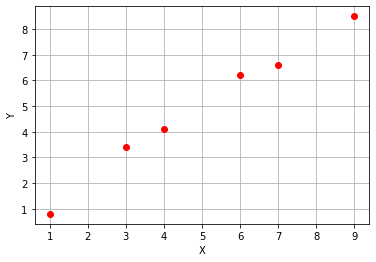

In [ ]:
# Data (x, y):
x = np.array([1, 3, 4, 6, 7, 9])[:, None]
y = np.array([0.8, 3.4, 4.1, 6.2, 6.6, 8.5])[:, None]
n = x.shape[0]
m = 2

# Print data set:
print("x = ")
print(x)
print()
print("y = ")
print(y) 

# Plot data:
plt.figure()
plt.plot(x,y,'ro') 
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Then we do the linear regression. Let us proceed step by step. 

**(1)** We compute the design matrix, whose rows are the transpose of the attribute vectors of every point in the data set. 

$$
\boldsymbol{\Phi} = \left( 
\begin{array}{cc}
1 & x_{1}\\
1 & x_{2}\\
1 & x_{3}\\
1 & x_{4}\\
1 & x_{5}\\
1 & x_{6}\\
\end{array} 
\right) =
\left( 
\begin{array}{cc}
1 & 1\\
1 & 3\\
1 & 4\\
1 & 6\\
1 & 7\\
1 & 9\\
\end{array} 
\right)
$$



In [ ]:
# Design matrix:
phi = np.concatenate((np.ones([n,1]), x),axis = 1)
print(phi)

[[1. 1.]
 [1. 3.]
 [1. 4.]
 [1. 6.]
 [1. 7.]
 [1. 9.]]


**(2)** We compute the matrix ${\bf A}$ as ${\bf A} = \boldsymbol{\Phi}^{T} \boldsymbol{\Phi}$:

In [ ]:
# Matrix A:
A = np.dot(phi.transpose(), phi)
print(A)

[[  6.  30.]
 [ 30. 192.]]


**(3)** We compute the vector $\boldsymbol{\Phi}^{T} {\bf y}$ and we call it ${\bf b}$:

In [ ]:
# Vector b:
b = np.dot(phi.transpose(), y)
print(b)

[[ 29.6]
 [187.3]]


**(4)** We compute the matrix $({\bf A} + \lambda I)$ and we call it ${\bf Q}$:

In [ ]:
# Matrix Q, l is the regularization parameter:
l = 1.
Q = A + l*np.eye(m);
print(Q)

[[  7.  30.]
 [ 30. 193.]]


**(5)** Now we have to solve the problem:

$$
({\bf A} + \lambda I) {\bf w} =  \boldsymbol{\Phi}^{T} {\bf y}
$$

Or equivalently:

$$
{\bf Q} {\bf w} = {\bf b}
$$

With

$$
{\bf Q} = {\bf A} + \lambda I
$$

and 

$$
{\bf b} = \boldsymbol{\Phi}^{T} {\bf y}
$$

We solve the linear system with <a href="http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html">numpy.linalg.solve</a>:

In [ ]:
# Solve the system Qw = b:
w = np.linalg.solve(Q, b)
print(w)

[[0.20798226]
 [0.93813747]]


**(6)** And finally we obtain the vector of target estimations as $\hat{{\bf y}}_{primal} = \boldsymbol{\Phi} {\bf w}$, and plot the results:

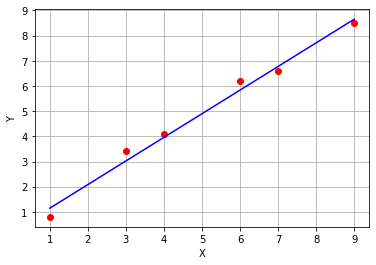

In [ ]:
# Estimation of y:
yprimal = np.dot(phi, w)

# Plot:
plt.figure()
plt.plot(x,y,'ro',x,yprimal,'b-') 
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### An example with python (dual formulation)

**(1)** First we compute the kernel matrix ${\bf K} = \boldsymbol{\Phi} \boldsymbol{\Phi}^{T}$. Note that this matrix is $6 \times 6$ ($6$ is the number of patterns) while the matrix ${\bf A}$ was $2 \times 2$ ($2$ is the dimension of the attribute space).

In [ ]:
# Matriz K:
K = np.dot(phi, phi.transpose())
print(K)

[[ 2.  4.  5.  7.  8. 10.]
 [ 4. 10. 13. 19. 22. 28.]
 [ 5. 13. 17. 25. 29. 37.]
 [ 7. 19. 25. 37. 43. 55.]
 [ 8. 22. 29. 43. 50. 64.]
 [10. 28. 37. 55. 64. 82.]]


**(2)** Then we compute the matrix ${\bf K} + \lambda I$ and we call it ${\bf Z}$: 

In [ ]:
# Matrix Z:
Z = K + l*np.eye(n)
print(Z)

[[ 3.  4.  5.  7.  8. 10.]
 [ 4. 11. 13. 19. 22. 28.]
 [ 5. 13. 18. 25. 29. 37.]
 [ 7. 19. 25. 38. 43. 55.]
 [ 8. 22. 29. 43. 51. 64.]
 [10. 28. 37. 55. 64. 83.]]


**(3)** We solve the problem ${\bf Z} {\bf a} = {\bf y}$

In [ ]:
# Solve the system Za = y:
a = np.linalg.solve(Z,y)
print(a)

[[-0.34611973]
 [ 0.37760532]
 [ 0.13946785]
 [ 0.3631929 ]
 [-0.17494457]
 [-0.15121951]]


**(4)** And finally we obtain the vector of target estimations as $\hat{{\bf y}}_{dual} = \boldsymbol{\Phi} \boldsymbol{\Phi}^{T} {\bf a}$, and plot the results. We must obtain the same solution as before.

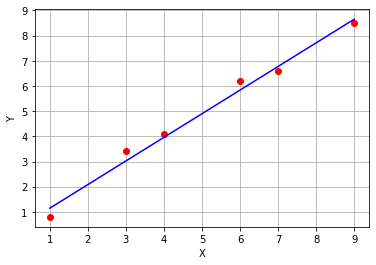

In [ ]:
# Estimation of y:
ydual = np.dot(phi, np.dot(phi.transpose(), a))

# Plot:
plt.figure()
plt.plot(x,y,'ro',x,ydual,'b-') 
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

We can check that the estimations in the primal and dual formulations are exactly the same:

In [ ]:
print("yprim = ")
print(yprimal)
print()
print("ydual = ")
print(ydual)

yprim = 
[[1.14611973]
 [3.02239468]
 [3.96053215]
 [5.8368071 ]
 [6.77494457]
 [8.65121951]]

ydual = 
[[1.14611973]
 [3.02239468]
 [3.96053215]
 [5.8368071 ]
 [6.77494457]
 [8.65121951]]


### So all you need is... a kernel

**The polynomial kernel:**

$$
k({\bf x}, {\bf z}) = ({\bf x}^{T} {\bf z} + C)^{P}
$$

- For example, with ${\bf x} = (x_{1}, x_{2})$, $C = 1$ and $P = 2$ we have:

$$
k({\bf x}, {\bf z}) = ({\bf x}^{T} {\bf z} + 1)^{2} = (x_{1} z_{1} + x_{2} z_{2} + 1)^{2} 
$$

- Which can be expressed as:

$$
k({\bf x}, {\bf z}) = 
(x_{1}^{2}, x_{2}^{2}, \sqrt{2} x_{1} x_{2}, \sqrt{2} x_{1} , \sqrt{2} x_{2}, 1)
\left(
\begin{array}{cc}
z_{1}^{2}\\
z_{2}^{2}\\
\sqrt{2} z_{1} z_{2}\\
\sqrt{2} z_{1}\\
\sqrt{2} z_{2}\\
1\\
\end{array} 
\right)
$$

- The corresponding transformation is:

$$
\boldsymbol{\phi} ({\bf x}) = 
\left(
\begin{array}{cc}
x_{1}^{2}\\
x_{2}^{2}\\
\sqrt{2} x_{1} x_{2}\\
\sqrt{2} x_{1}\\
\sqrt{2} x_{2}\\
1\\
\end{array} 
\right)
$$

**The RBF kernel:**

$$
k({\bf x}, {\bf z}) = \exp{\left(-\frac{||{\bf x} - {\bf z}||^{2}}{2 \sigma^{2}}\right)}
$$

- The corresponding attribute space is infinite-dimensional

- For example, with ${\bf x} = x$, and $\sigma = 1$ we have:

$$
k(x, z) = \exp{\left(-\frac{(x - z)^{2}}{2}\right)} = \exp{(-x^{2}/2)} \exp{(-z^{2}/2)} \exp{(xz)}
$$

- Which can be expressed as:

$$
k(x, z) = \exp{(-x^{2}/2)} \exp{(-z^{2}/2)} \sum_{n=0}^{\infty}\frac{x^{n}z^{n}}{n!}
$$

- The attribute vector is:

$$
\boldsymbol{\phi} (x) = \exp{(-x^{2}/2)}
\left(
\begin{array}{cc}
1\\
x\\
x^{2}/\sqrt{2}\\
x^{3}/\sqrt{6}\\
\vdots\\
\end{array} 
\right)
$$

### Conclusion

**In the primal formulation:**

$$
\hat{y} ({\bf x}) = {\bf w}^{T}  \boldsymbol{\phi} ({\bf x}) = \sum_{j=1}^{M} w_{j} \phi_{j}({\bf x})
$$

To obtain ${\bf w}$ we have to invert the matrix ${\bf A} + \lambda I$, which is $M \times M$

**In the dual formulation:**

$$
\hat{y} ({\bf x}) = {\bf a}^{T} \boldsymbol{\Phi} \boldsymbol{\phi} ({\bf x}) = \sum_{i=1}^{N} a_{i} k({\bf x}_{i},{\bf x})
$$

To obtain ${\bf a}$ we have to invert the matrix ${\bf K} + \lambda I$, which is $N \times N$

This technique is generalizable to other problems


<a id='appendix'></a>

# <font color="#04B404">Appendix</font>
## <font color="#6E6E6E">Derivation of the regularized linear regression equations</font>

### Minimization of $J({\bf w})$

- We want to minimize:

$$
\begin{eqnarray}
J({\bf w}) &=& \frac{1}{2} \sum_{i=1}^{N}\{y_{i} - {\bf w}^{T}  \boldsymbol{\phi} ({\bf x}_{i})\}^{2} + \frac{\lambda}{2} ||{\bf w}||^{2} \nonumber \\
&=& \frac{1}{2} \sum_{i=1}^{N}\{y_{i} - \sum_{j=1}^{M} w_{j} \phi_{j}({\bf x}_{i})\}^{2} + \frac{\lambda}{2} \sum_{j=1}^{M} w_{j}^{2} \nonumber
\end{eqnarray}$$


- With respect to the parameters $w_{k}$:

$$
\frac{\partial J({\bf w})}{\partial w_{k}} = 0
$$

- Operating:

$$
\begin{eqnarray}
\frac{\partial J({\bf w})}{\partial w_{k}} &=& - \sum_{i=1}^{N} y_{i}\phi_{k}({\bf x}_{i})  + \sum_{i=1}^{N} \sum_{j=1}^{M} w_{j} \phi_{j}({\bf x}_{i}) \phi_{k}({\bf x}_{i}) + \lambda w_{k} \nonumber \\
&=& - \sum_{i=1}^{N} y_{i}\Phi_{ik}  + \sum_{i=1}^{N} \sum_{j=1}^{M} w_{j} \Phi_{ij} \Phi_{ik} + \lambda w_{k} \nonumber\\
&=& - \sum_{i=1}^{N} \Phi_{ki}^{T} y_{i} + \sum_{j=1}^{M} \sum_{i=1}^{N} \Phi_{ki}^{T} \Phi_{ij} w_{j} + \lambda w_{k} \nonumber \\
&=& - (\boldsymbol{\Phi}^{T} {\bf y})_{k} + \sum_{j=1}^{M} (\boldsymbol{\Phi}^{T} \boldsymbol{\Phi})_{kj} w_{j} + \lambda w_{k} \nonumber \\
&=& - (\boldsymbol{\Phi}^{T} {\bf y})_{k} + (\boldsymbol{\Phi}^{T} \boldsymbol{\Phi} {\bf w})_{k} + \lambda w_{k} \nonumber \\
&=& 0 \nonumber
\end{eqnarray}
$$

- Finally:

$$
-\boldsymbol{\Phi}^{T} {\bf y} + \boldsymbol{\Phi}^{T} \boldsymbol{\Phi} {\bf w} + \lambda {\bf w} = {\bf 0}
$$

- Or equivalently:

$$
({\bf A} + \lambda I) {\bf w} = \boldsymbol{\Phi}^{T} {\bf y}
$$

- Remember that $\boldsymbol{\Phi}$ is the *design matrix*, $\Phi_{ij} = \phi_{j}({\bf x}_{i})$ and ${\bf A} = \boldsymbol{\Phi}^{T} \boldsymbol{\Phi}$ is a $M \times M$ matrix

- We can obtain ${\bf w}$ as:

$$
{\bf w} = ({\bf A} + \lambda I)^{-1} \boldsymbol{\Phi}^{T} {\bf y}
$$

### Reformulation of regularized linear regression

- Let's proceed in a different way:

$$
\frac{\partial J({\bf w})}{\partial w_{k}} = - \sum_{i=1}^{N} \Phi_{ki}^{T} y_{i} + \sum_{j=1}^{M} \sum_{i=1}^{N} \Phi_{ki}^{T} \Phi_{ij} w_{j} + \lambda w_{k} = 0
$$

- We can obtain $w_{k}$ as:

$$
\begin{eqnarray}
w_{k} &=& -\frac{1}{\lambda} \sum_{i=1}^{N} \{ \sum_{j=1}^{M} \Phi_{ki}^{T} \Phi_{ij} w_{j} - \Phi_{ki}^{T} y_{i}\} \nonumber \\
&=& -\frac{1}{\lambda} \sum_{i=1}^{N} \Phi_{ki}^{T} \{ \sum_{j=1}^{M} \Phi_{ij} w_{j} - y_{i}\} \nonumber \\
&=& -\frac{1}{\lambda} \sum_{i=1}^{N} \Phi_{ki}^{T} \{ \sum_{j=1}^{M} w_{j} \phi_{j}({\bf x}_{i}) - y_{i}\} \nonumber \\
&=& -\frac{1}{\lambda} \sum_{i=1}^{N} \Phi_{ki}^{T} \{ {\bf w}^{T} \boldsymbol{\phi}({\bf x}_{i}) - y_{i}\} \nonumber \\
&=& \sum_{i=1}^{N} \Phi_{ki}^{T} a_{i} \nonumber 
\end{eqnarray}
$$

- Where we have defined $a_{i}$ as:

$$
a_{i} = -\frac{1}{\lambda}\{ {\bf w}^{T} \boldsymbol{\phi}({\bf x}_{i}) - y_{i}\}
$$

- Now we can substitute $w_{k}$ into $J({\bf w})$ to obtain an expression that depends only on ${\bf a}:$

$$
J({\bf a}) = \frac{1}{2} \sum_{i=1}^{N}\{y_{i} - \sum_{j=1}^{M} \sum_{k=1}^{N} \Phi_{jk}^{T} a_{k} \Phi_{ij}\}^{2} + \frac{\lambda}{2} \sum_{j=1}^{M} (\sum_{k=1}^{N} \Phi_{jk}^{T} a_{k} )^{2}
$$

- The *dual problem* consists of minimizing $J({\bf a})$ with respect to $a_{k}$:

$$
\frac{\partial J({\bf a})}{\partial a_{k}} = 0
$$

- After some algebra we obtain:

$$
{\bf a} = ({\bf K} + \lambda I)^{-1} {\bf y}
$$

- Where ${\bf K} = \boldsymbol{\Phi} \boldsymbol{\Phi}^{T}$ is a $N \times N$ matrix that satisfies that:

$$
{\bf K}_{ij} = \boldsymbol{\phi}({\bf x}_{i})^{T} \boldsymbol{\phi}({\bf x}_{j}) \equiv k({\bf x}_{i},{\bf x}_{j})
$$

- The function $k({\bf x}_{i},{\bf x}_{j})$ is known as a *kernel* function
